In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from catboost import Pool, CatBoostRegressor

import seaborn as sns

from IPython.display import display
pd.options.display.max_columns = None

In [3]:
cars = pd.read_csv("vehicles_clean.csv")
cars.head()

,vin,price,savings_amount,make_name,model_name,year,mileage,body_type,engine_displacement,engine_type,horsepower,torque,transmission,wheel_system,wheelbase,fuel_type,fuel_tank_volume,height,length,width,back_legroom,front_legroom,listing_color,major_options,major_options_number,maximum_seating,city,latitude,longitude,daysonmarket,listed_date,franchise_dealer,seller_rating
0,ZACNJABB5KPJ92081,23141.0,0,Jeep,Renegade,2019,7.0,SUV / Crossover,1300.0,I4,177.0,200.0,A,FWD,101.2,Gasoline,12.7,66.5,166.6,79.6,35.1,41.2,YELLOW,['Quick Order Package'],1,5.0,Bayamon,18.3988,-66.1582,522,2019-04-06,True,2.8
1,SALCJ2FX1LH858117,46500.0,0,Land Rover,Discovery Sport,2020,8.0,SUV / Crossover,2000.0,I4,246.0,269.0,A,AWD,107.9,Gasoline,17.7,68.0,181.0,85.6,38.1,39.1,BLACK,['Adaptive Cruise Control'],1,7.0,San Juan,18.4439,-66.0785,207,2020-02-15,True,3.0
2,SALRR2RV0L2433391,67430.0,0,Land Rover,Discovery,2020,11.0,SUV / Crossover,3000.0,V6,340.0,332.0,A,AWD,115.0,Gasoline,23.5,73.0,195.1,87.4,37.6,39.0,GRAY,NaN,0,7.0,San Juan,18.4439,-66.0785,196,2020-02-26,True,3.0
3,SALCJ2FXXLH862327,48880.0,0,Land Rover,Discovery Sport,2020,7.0,SUV / Crossover,2000.0,I4,246.0,269.0,A,AWD,107.9,Gasoline,17.7,68.0,181.0,85.6,38.1,39.1,BLACK,['Adaptive Cruise Control'],1,7.0,San Juan,18.4439,-66.0785,137,2020-04-25,True,3.0
4,SALYK2EX1LA261711,66903.0,0,Land Rover,Range Rover Velar,2020,12.0,SUV / Crossover,2000.0,I4,247.0,269.0,A,AWD,113.1,Gasoline,16.6,66.3,188.9,84.4,37.1,40.2,UNKNOWN,"['Leather Seats', 'Sunroof/Moonroof', 'Navigat...",8,5.0,San Juan,18.4439,-66.0785,242,2020-01-11,True,3.0


In [4]:
cars = cars.set_index("vin")
cars = cars.drop(["major_options", "listed_date"], axis = 1)
cars.head()

,price,savings_amount,make_name,model_name,year,mileage,body_type,engine_displacement,engine_type,horsepower,torque,transmission,wheel_system,wheelbase,fuel_type,fuel_tank_volume,height,length,width,back_legroom,front_legroom,listing_color,major_options_number,maximum_seating,city,latitude,longitude,daysonmarket,franchise_dealer,seller_rating
vin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ZACNJABB5KPJ92081,23141.0,0,Jeep,Renegade,2019,7.0,SUV / Crossover,1300.0,I4,177.0,200.0,A,FWD,101.2,Gasoline,12.7,66.5,166.6,79.6,35.1,41.2,YELLOW,1,5.0,Bayamon,18.3988,-66.1582,522,True,2.8
SALCJ2FX1LH858117,46500.0,0,Land Rover,Discovery Sport,2020,8.0,SUV / Crossover,2000.0,I4,246.0,269.0,A,AWD,107.9,Gasoline,17.7,68.0,181.0,85.6,38.1,39.1,BLACK,1,7.0,San Juan,18.4439,-66.0785,207,True,3.0
SALRR2RV0L2433391,67430.0,0,Land Rover,Discovery,2020,11.0,SUV / Crossover,3000.0,V6,340.0,332.0,A,AWD,115.0,Gasoline,23.5,73.0,195.1,87.4,37.6,39.0,GRAY,0,7.0,San Juan,18.4439,-66.0785,196,True,3.0
SALCJ2FXXLH862327,48880.0,0,Land Rover,Discovery Sport,2020,7.0,SUV / Crossover,2000.0,I4,246.0,269.0,A,AWD,107.9,Gasoline,17.7,68.0,181.0,85.6,38.1,39.1,BLACK,1,7.0,San Juan,18.4439,-66.0785,137,True,3.0
SALYK2EX1LA261711,66903.0,0,Land Rover,Range Rover Velar,2020,12.0,SUV / Crossover,2000.0,I4,247.0,269.0,A,AWD,113.1,Gasoline,16.6,66.3,188.9,84.4,37.1,40.2,UNKNOWN,8,5.0,San Juan,18.4439,-66.0785,242,True,3.0


In [8]:
#cars = cars.drop(['torque', 'body_type', 'engine_type', 'seller_rating'], axis = 1)

In [9]:
cars_train, cars_test = train_test_split(cars, test_size = 0.2, random_state = 42)

X_train = cars_train.drop(["price"], axis = 1)
y_train = cars_train["price"]

X_test = cars_test.drop(["price"], axis = 1)
y_test = cars_test["price"]

In [10]:
train_pool = Pool(X_train, y_train,
                  cat_features = ["make_name", "model_name", "transmission", "wheel_system", "fuel_type", "listing_color", "city", "franchise_dealer"])

In [11]:
test_pool = Pool(X_test, y_test,
                 cat_features = ["make_name", "model_name", "transmission", "wheel_system", "fuel_type", "listing_color", "city", "franchise_dealer"])

In [12]:
model = CatBoostRegressor()

In [14]:
model.fit(train_pool)

Learning rate set to 0.136357
0:	learn: 14693.3194513	total: 672ms	remaining: 11m 10s
1:	learn: 13384.0117397	total: 1.04s	remaining: 8m 40s
2:	learn: 12234.2806087	total: 1.46s	remaining: 8m 5s
3:	learn: 11302.8214785	total: 1.92s	remaining: 7m 58s
4:	learn: 10489.6913399	total: 2.48s	remaining: 8m 13s
5:	learn: 9797.0986538	total: 2.83s	remaining: 7m 48s
6:	learn: 9208.2147226	total: 3.25s	remaining: 7m 40s
7:	learn: 8719.9642115	total: 3.6s	remaining: 7m 25s
8:	learn: 8313.6922933	total: 3.96s	remaining: 7m 16s
9:	learn: 7959.9531103	total: 4.33s	remaining: 7m 8s
10:	learn: 7678.7633249	total: 4.68s	remaining: 7m 1s
11:	learn: 7397.2051134	total: 5.08s	remaining: 6m 57s
12:	learn: 7171.6676705	total: 5.52s	remaining: 6m 59s
13:	learn: 6979.1105098	total: 5.93s	remaining: 6m 57s
14:	learn: 6832.4579675	total: 6.27s	remaining: 6m 51s
15:	learn: 6669.5695938	total: 6.61s	remaining: 6m 46s
16:	learn: 6564.4227018	total: 6.98s	remaining: 6m 43s
17:	learn: 6459.6113982	total: 7.33s	remain

150:	learn: 4769.2933292	total: 59s	remaining: 5m 31s
151:	learn: 4766.5729727	total: 59.4s	remaining: 5m 31s
152:	learn: 4762.1379198	total: 59.7s	remaining: 5m 30s
153:	learn: 4758.5905957	total: 1m	remaining: 5m 29s
154:	learn: 4756.5080790	total: 1m	remaining: 5m 29s
155:	learn: 4750.9977776	total: 1m	remaining: 5m 28s
156:	learn: 4748.4975413	total: 1m 1s	remaining: 5m 28s
157:	learn: 4744.7361531	total: 1m 1s	remaining: 5m 27s
158:	learn: 4741.8620320	total: 1m 1s	remaining: 5m 27s
159:	learn: 4740.3510661	total: 1m 2s	remaining: 5m 26s
160:	learn: 4738.6748346	total: 1m 2s	remaining: 5m 26s
161:	learn: 4736.9620453	total: 1m 2s	remaining: 5m 25s
162:	learn: 4731.2812636	total: 1m 3s	remaining: 5m 24s
163:	learn: 4726.0528605	total: 1m 3s	remaining: 5m 24s
164:	learn: 4721.7915026	total: 1m 4s	remaining: 5m 24s
165:	learn: 4718.4921186	total: 1m 4s	remaining: 5m 23s
166:	learn: 4715.9143767	total: 1m 4s	remaining: 5m 23s
167:	learn: 4712.3873454	total: 1m 5s	remaining: 5m 23s
168

295:	learn: 4481.0064327	total: 1m 54s	remaining: 4m 31s
296:	learn: 4480.5415689	total: 1m 54s	remaining: 4m 31s
297:	learn: 4479.2527327	total: 1m 54s	remaining: 4m 30s
298:	learn: 4478.1940132	total: 1m 55s	remaining: 4m 30s
299:	learn: 4477.4280444	total: 1m 55s	remaining: 4m 29s
300:	learn: 4477.2823327	total: 1m 55s	remaining: 4m 29s
301:	learn: 4476.4695857	total: 1m 56s	remaining: 4m 28s
302:	learn: 4475.4665902	total: 1m 56s	remaining: 4m 28s
303:	learn: 4474.1344305	total: 1m 56s	remaining: 4m 27s
304:	learn: 4472.5137623	total: 1m 57s	remaining: 4m 27s
305:	learn: 4471.3452550	total: 1m 57s	remaining: 4m 26s
306:	learn: 4469.9733694	total: 1m 57s	remaining: 4m 26s
307:	learn: 4468.5989143	total: 1m 58s	remaining: 4m 25s
308:	learn: 4467.5688351	total: 1m 58s	remaining: 4m 24s
309:	learn: 4466.3453153	total: 1m 58s	remaining: 4m 24s
310:	learn: 4464.5774352	total: 1m 59s	remaining: 4m 24s
311:	learn: 4462.2576315	total: 1m 59s	remaining: 4m 23s
312:	learn: 4461.2579668	total:

440:	learn: 4290.7393453	total: 2m 47s	remaining: 3m 32s
441:	learn: 4290.0871332	total: 2m 48s	remaining: 3m 32s
442:	learn: 4289.1979709	total: 2m 48s	remaining: 3m 31s
443:	learn: 4288.1763412	total: 2m 48s	remaining: 3m 31s
444:	learn: 4287.4402132	total: 2m 49s	remaining: 3m 30s
445:	learn: 4287.0759764	total: 2m 49s	remaining: 3m 30s
446:	learn: 4286.1566940	total: 2m 49s	remaining: 3m 30s
447:	learn: 4285.7962675	total: 2m 50s	remaining: 3m 30s
448:	learn: 4285.1962404	total: 2m 50s	remaining: 3m 29s
449:	learn: 4284.0348539	total: 2m 51s	remaining: 3m 29s
450:	learn: 4283.4924081	total: 2m 51s	remaining: 3m 28s
451:	learn: 4282.9039893	total: 2m 51s	remaining: 3m 28s
452:	learn: 4282.4155973	total: 2m 52s	remaining: 3m 28s
453:	learn: 4281.7536089	total: 2m 52s	remaining: 3m 27s
454:	learn: 4281.2150916	total: 2m 53s	remaining: 3m 27s
455:	learn: 4280.7956480	total: 2m 53s	remaining: 3m 26s
456:	learn: 4280.1222804	total: 2m 53s	remaining: 3m 26s
457:	learn: 4279.3841913	total:

586:	learn: 4195.8670315	total: 3m 43s	remaining: 2m 37s
587:	learn: 4195.4941654	total: 3m 43s	remaining: 2m 36s
588:	learn: 4195.1481012	total: 3m 44s	remaining: 2m 36s
589:	learn: 4194.7814113	total: 3m 44s	remaining: 2m 36s
590:	learn: 4194.5469433	total: 3m 44s	remaining: 2m 35s
591:	learn: 4194.3077384	total: 3m 45s	remaining: 2m 35s
592:	learn: 4193.6773769	total: 3m 45s	remaining: 2m 34s
593:	learn: 4193.3210544	total: 3m 46s	remaining: 2m 34s
594:	learn: 4192.9405167	total: 3m 46s	remaining: 2m 34s
595:	learn: 4192.2695749	total: 3m 46s	remaining: 2m 33s
596:	learn: 4191.7701408	total: 3m 47s	remaining: 2m 33s
597:	learn: 4191.4647068	total: 3m 47s	remaining: 2m 32s
598:	learn: 4191.1413755	total: 3m 47s	remaining: 2m 32s
599:	learn: 4190.6129786	total: 3m 48s	remaining: 2m 32s
600:	learn: 4189.9387507	total: 3m 48s	remaining: 2m 31s
601:	learn: 4189.4602914	total: 3m 49s	remaining: 2m 31s
602:	learn: 4189.1121131	total: 3m 49s	remaining: 2m 31s
603:	learn: 4188.7933562	total:

732:	learn: 4120.7975719	total: 4m 38s	remaining: 1m 41s
733:	learn: 4120.5898418	total: 4m 38s	remaining: 1m 40s
734:	learn: 4120.4824138	total: 4m 38s	remaining: 1m 40s
735:	learn: 4120.3945785	total: 4m 39s	remaining: 1m 40s
736:	learn: 4119.9363314	total: 4m 39s	remaining: 1m 39s
737:	learn: 4119.4270105	total: 4m 39s	remaining: 1m 39s
738:	learn: 4119.1916482	total: 4m 40s	remaining: 1m 39s
739:	learn: 4118.5753351	total: 4m 40s	remaining: 1m 38s
740:	learn: 4118.3019048	total: 4m 41s	remaining: 1m 38s
741:	learn: 4118.0125326	total: 4m 41s	remaining: 1m 37s
742:	learn: 4117.5671495	total: 4m 42s	remaining: 1m 37s
743:	learn: 4114.4271539	total: 4m 42s	remaining: 1m 37s
744:	learn: 4114.0875556	total: 4m 42s	remaining: 1m 36s
745:	learn: 4113.6192040	total: 4m 43s	remaining: 1m 36s
746:	learn: 4113.4076399	total: 4m 43s	remaining: 1m 36s
747:	learn: 4113.1110848	total: 4m 44s	remaining: 1m 35s
748:	learn: 4112.4388076	total: 4m 44s	remaining: 1m 35s
749:	learn: 4112.2288152	total:

878:	learn: 4035.3499203	total: 5m 31s	remaining: 45.6s
879:	learn: 4035.1136430	total: 5m 31s	remaining: 45.2s
880:	learn: 4034.9275124	total: 5m 31s	remaining: 44.8s
881:	learn: 4034.8118904	total: 5m 32s	remaining: 44.4s
882:	learn: 4034.3595529	total: 5m 32s	remaining: 44s
883:	learn: 4034.1227312	total: 5m 32s	remaining: 43.7s
884:	learn: 4033.9237412	total: 5m 33s	remaining: 43.3s
885:	learn: 4033.7708598	total: 5m 33s	remaining: 42.9s
886:	learn: 4033.5811439	total: 5m 33s	remaining: 42.5s
887:	learn: 4033.4470348	total: 5m 34s	remaining: 42.1s
888:	learn: 4033.2061770	total: 5m 34s	remaining: 41.7s
889:	learn: 4032.8620819	total: 5m 34s	remaining: 41.4s
890:	learn: 4032.7429218	total: 5m 34s	remaining: 41s
891:	learn: 4032.4476497	total: 5m 35s	remaining: 40.6s
892:	learn: 4031.9474398	total: 5m 35s	remaining: 40.2s
893:	learn: 4031.4316122	total: 5m 36s	remaining: 39.9s
894:	learn: 4031.3507792	total: 5m 36s	remaining: 39.5s
895:	learn: 4031.1916994	total: 5m 36s	remaining: 39

In [15]:
print(model.get_all_params())

{'nan_mode': 'Min', 'eval_metric': 'RMSE', 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'], 'iterations': 1000, 'sampling_frequency': 'PerTree', 'fold_permutation_block': 0, 'leaf_estimation_method': 'Newton', 'counter_calc_method': 'SkipTest', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'ctr_leaf_count_limit': 18446744073709551615, 'bayesian_matrix_reg': 0.10000000149011612, 'one_hot_max_size': 2, 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': True, 'max_ctr_complexity': 4, 'model_size_reg': 0.5, 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter

In [16]:
y_pred = model.predict(test_pool)

In [17]:
rmse = mean_squared_error(y_pred, y_test, squared=False)
rmse

4645.7610759864465

In [18]:
feature_importance = pd.DataFrame({"Features": X_train.columns, "Importance": model.get_feature_importance(train_pool)})

In [19]:
feature_importance = feature_importance.sort_values(by = ["Importance"], ascending=False)
feature_importance

,Features,Importance
6,horsepower,24.650568
4,mileage,18.600030
2,model_name,14.659919
3,year,10.014993
1,make_name,7.509786
12,height,2.769737
9,wheelbase,2.611236
8,wheel_system,2.213294
18,major_options_number,2.069010
0,savings_amount,1.961994


/Users/Konstantinos/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Features', ylabel='Importance'>

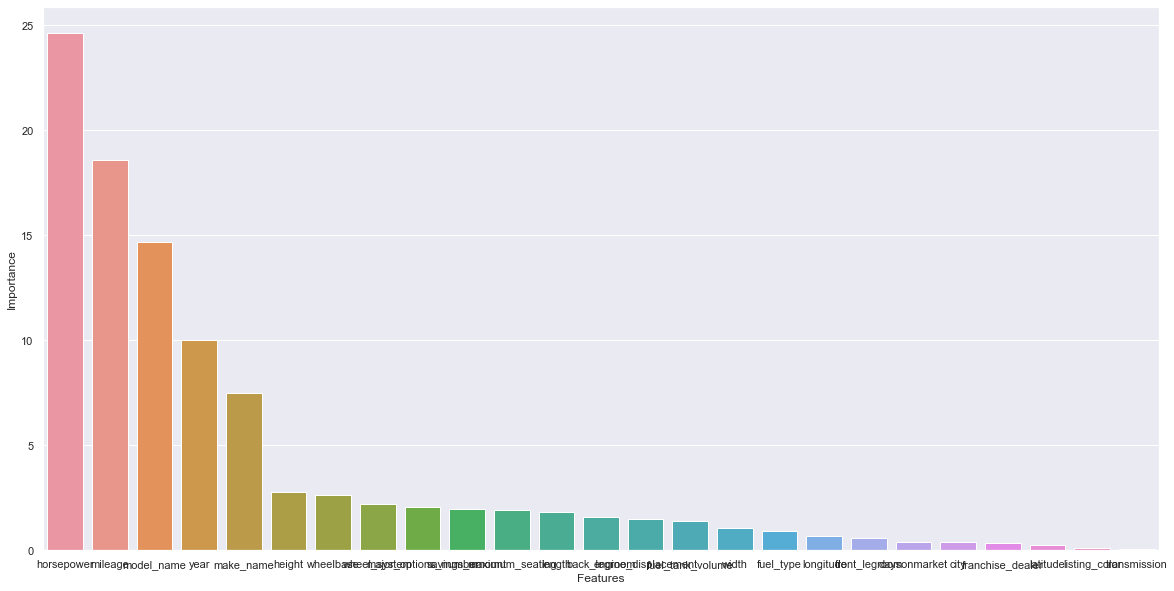

In [20]:
sns.set(rc = {"figure.figsize" : (20, 10)})

sns.barplot(feature_importance["Features"], feature_importance["Importance"])